# Import Necessary Libraries

In [1]:
# Data Manipulation and Linear Algebra
import pandas as pd
import numpy as np

# Plots
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, roc_curve, mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import ensemble

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore')

from pprint import pprint

# Data Preprocessing

## Getting the Data 

In [2]:
df = pd.read_csv("./datasets/churn.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Dropping some Columns of Less Importance

In [3]:
drop_cols = ["RowNumber", "CustomerId", "Surname"]
df.drop(columns=drop_cols, inplace=True)

In [4]:
df.info() # Luckiley we dont have any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# EDA

## Plotting Correlation Heatmap Before Encoding Categorical Variables

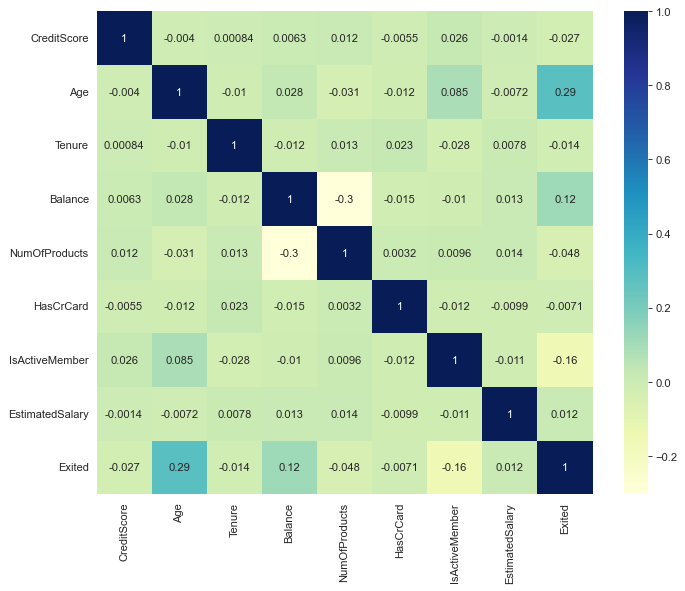

In [6]:
plt.figure(dpi=80, figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu") # Not many correlations between features
plt.show()

## Distribution Plots

<AxesSubplot:xlabel='Balance', ylabel='Count'>

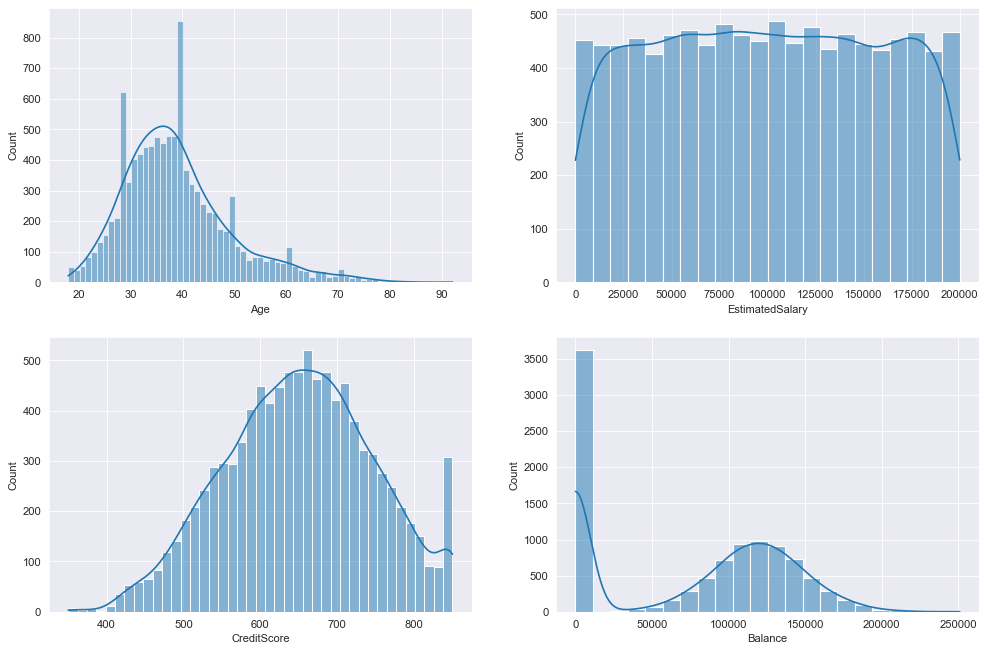

In [7]:
plt.figure(figsize=(15, 10), dpi=80)

plt.subplot(221)
sns.histplot(df["Age"], kde=True) # Age is Right Skewed and most of the people are around 30 - 40 years old

plt.subplot(222)
sns.histplot(df["EstimatedSalary"], kde=True) # Salary is Well Distributed

plt.subplot(223)
sns.histplot(df["CreditScore"], kde=True) # Credit Score is Left Skewed and most people have 600 - 700 Credit Score

plt.subplot(224)
sns.histplot(df["Balance"], kde=True) # Balance Data is also well distributed if 0 is ignored

## Age vs IsActiveMember, Exited

Text(0.5, 1.0, 'Exited vs Age')

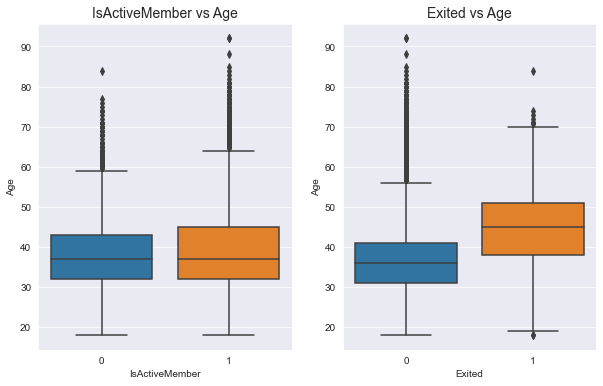

In [8]:
plt.figure(figsize=(10, 6))

plt.subplot(121)
sns.boxplot(x="IsActiveMember", y="Age", data=df)
plt.title("IsActiveMember vs Age", fontdict={"fontsize": 14, "fontweight":500})

plt.subplot(122)
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Exited vs Age", fontdict={"fontsize": 14, "fontweight":500})

# People of Higher age i.e., 40 years and above tend to leave the bank more

## Balance vs Exited

Text(0.5, 1.0, 'Exited vs Balance')

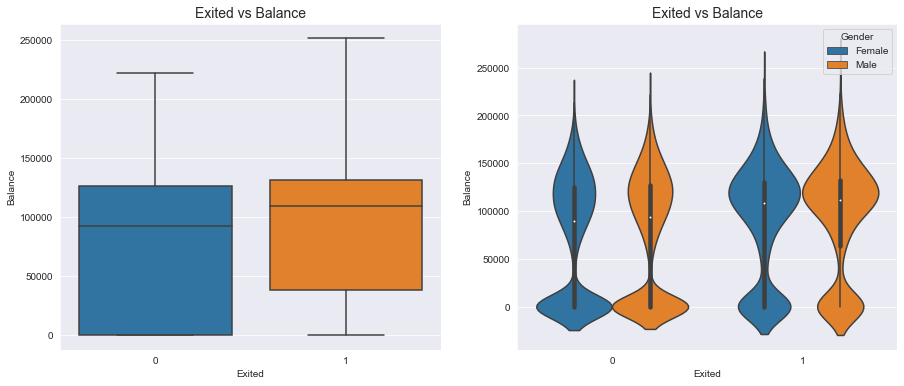

In [9]:
plt.figure(figsize=(15, 6))

plt.subplot(121)
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Exited vs Balance", fontdict={"fontsize": 14, "fontweight":500})
# If we observe Median value people with Higher balance tend to leave bank

plt.subplot(122)
sns.violinplot(x="Exited", y="Balance", hue="Gender", data=df)
plt.title("Exited vs Balance", fontdict={"fontsize": 14, "fontweight":500})

## NumOfProducts vs Balance

Text(0.5, 1.0, 'NumOfProducts vs Balance')

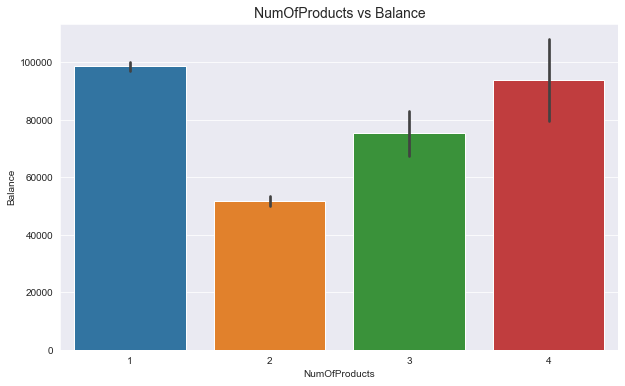

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x="NumOfProducts", y="Balance", data=df)
plt.title("NumOfProducts vs Balance", fontdict={"fontsize": 14, "fontweight":500})
# Most of the people have 1 or 4 products

## Pair Plot

In [11]:
# sns.pairplot(df, hue="Gender")
# plt.show()

# Preparing Data

## OneHotEncoding Data

In [12]:
df = pd.get_dummies(df)
df.reset_index(drop=True, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


## Stratified Train Test Split
### Evenly Spreading the Dependent Variable "status" in Train and Test set

In [13]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Exited']):
    train = df.loc[train_index]
    test = df.loc[test_index]

In [14]:
X_train = train.drop("Exited", axis=1)
y_train = train["Exited"]

X_test = test.drop("Exited", axis=1)
y_test = test["Exited"]

## Feature Scaling

In [15]:
cols_to_scale = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

sc = StandardScaler()

X_train[cols_to_scale] = sc.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = sc.transform(X_test[cols_to_scale])

# RandomForestClassifier

In [16]:
def MLA_testing(MLA, X_train, X_test, y_train, y_test):      
    # Training The Model
    MLA.fit(X_train, y_train)

    # KFold Accuracies on Training Data
    kfold_accuracy = cross_val_score(estimator = MLA, X = X_train, y = y_train, cv = 10, n_jobs=-1)
    print("K-Fold Accuracies:\n", kfold_accuracy, "\n")
    
    # Prediction on Testing Data
    y_pred = cross_val_predict(estimator = MLA, X = X_test, y = y_test, cv = 10, n_jobs=-1)
    
    # Accuracy for y_test and y_pred
    classifier_accuracy_score = accuracy_score(y_test, y_pred)
    print("Accuracy Score:\n", classifier_accuracy_score, "\n")
    
    # Confusion Matrix
    conf_mtx = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_mtx, "\n")
    
    # Classification Report
    class_rep = classification_report(y_test, y_pred)
    print("Classification Report:\n", class_rep, "\n")
    
    try:
        # Precision - Recall Curve
        yhat = MLA.predict_proba(X_test)
        precision, recall, _ = precision_recall_curve(y_test, yhat[:, 1])
        
        plt.figure(dpi=100, figsize=(15, 6))
        plt.subplot(121)
        sns.lineplot([0, 1], [1, 0], linestyle='--', label='No Skill')
        sns.lineplot(recall, precision, marker='.', label=MLA.__class__.__name__)
        plt.title("Recall vs Precision Curve")
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend()
        
        # ROC Curve
        plt.subplot(122)
        sns.lineplot([0, 1], [0, 1], linestyle='--', label='No Skill')
        fpr, tpr, _ = roc_curve(y_test, yhat[:, 1])
        sns.lineplot(fpr, tpr, marker='.', label=MLA.__class__.__name__)
        plt.title("ROC Curve")
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        
        plt.show()
    except:
        pass
    
    # Important Features for The Algorithms
    imp_cols = pd.DataFrame()
    imp_cols["Features"] = X_train.columns
    imp_cols["Importance"] = MLA.feature_importances_
    imp_cols = imp_cols.sort_values(by="Importance", ascending=False)
    
    plt.figure(dpi=80, figsize=(10, 8))
    sns.barplot(y="Features", x="Importance", data=imp_cols)
    plt.title("Importance of Features")
    plt.show()

K-Fold Accuracies:
 [0.86    0.8575  0.85625 0.87    0.84125 0.8575  0.86875 0.85625 0.86625
 0.87   ] 

Accuracy Score:
 0.86 

Confusion Matrix:
 [[1545   48]
 [ 232  175]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.43      0.56       407

    accuracy                           0.86      2000
   macro avg       0.83      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000
 



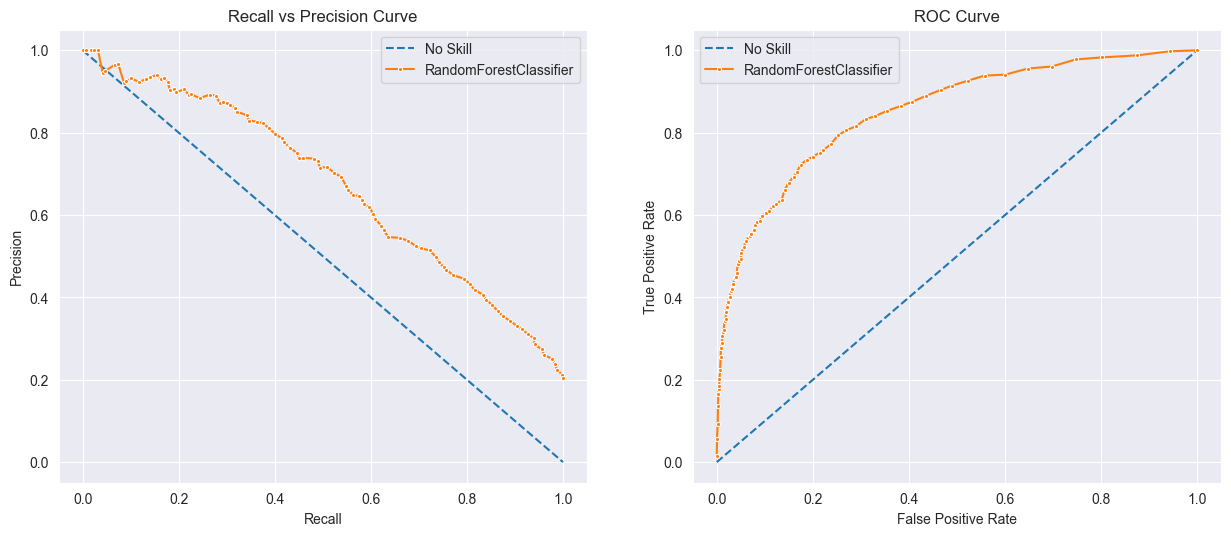

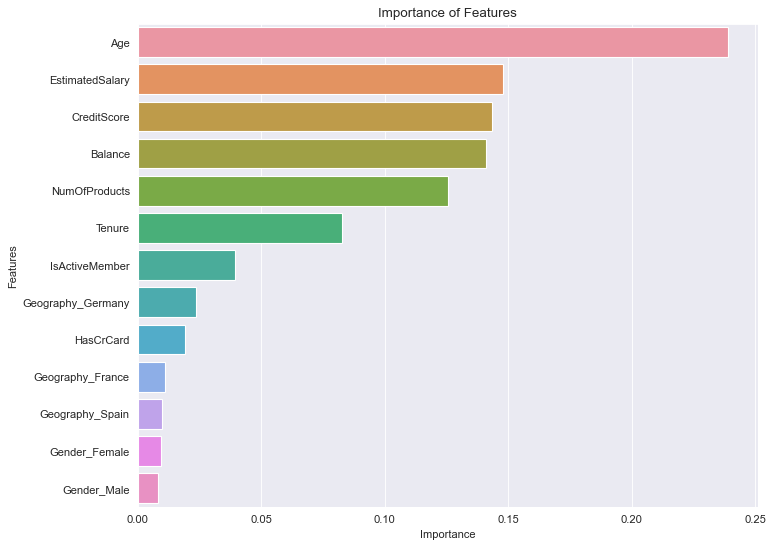

In [17]:
rf_clf = ensemble.RandomForestClassifier()

MLA_testing(rf_clf, X_train, X_test, y_train, y_test)

In [18]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf_clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


## Hyper Parameter Tuning Using RandomSearchCV

In [19]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [20]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [21]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(
    estimator = rf_clf,
    param_distributions = random_grid, 
    n_iter = 100, 
    cv = 3,
    verbose=2,
    random_state=42,
    n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [22]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': True}

In [23]:
# Evaluate The Model

def evaluate(model, test_features, test_labels):
    y_pred = np.round(model.predict(test_features))
    mae = mean_absolute_error(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    print("Model Performance")
    print("Mean Absolute Error : {:0.4f}".format(mae))
    print("Accuracy : {:0.2f}".format(accuracy))
    
    return accuracy

base_model = ensemble.RandomForestRegressor(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

Model Performance
Mean Absolute Error : 0.1405
Accuracy : 0.86


In [24]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

Model Performance
Mean Absolute Error : 0.1335
Accuracy : 0.87


In [25]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.81%.


## Hyper Parameter Tuning Using GridSearch and Cross Validation

In [26]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create a based model
rf = ensemble.RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator = rf,
    param_grid = param_grid, 
    cv = 3,
    n_jobs = -1,
    verbose = 2)

In [27]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 300}

In [29]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Mean Absolute Error : 0.1340
Accuracy : 0.87


In [30]:
print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Improvement of 0.76%.
